In [11]:
# Libraries
import pandas as pd
from src import route_and_map as rm
from src import flights as fl
import datetime

In [12]:
start_airport = "LIS"
must_go = ["SIN", "ADL", "LAX"]
start_date = "2023-01-10"

In [13]:
airports = pd.read_csv("data/airports_cleaned.csv", keep_default_na=False)
airports

,airport_name,city,country,IATA,latitude,longitude,continent_code,continent
0,Goroka Airport,Goroka,Papua New Guinea,GKA,-6.081690,145.391998,OC,Oceania
1,Madang Airport,Madang,Papua New Guinea,MAG,-5.207080,145.789001,OC,Oceania
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,-5.826790,144.296005,OC,Oceania
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,-6.569803,146.725977,OC,Oceania
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,-9.443380,147.220001,OC,Oceania
...,...,...,...,...,...,...,...,...
5919,Bilogai-Sugapa Airport,Sugapa-Papua Island,Indonesia,UGU,-3.739560,137.031998,AS,Asia
5920,Ramon Airport,Eilat,Israel,ETM,29.723694,35.011416,AS,Asia
5921,Rustaq Airport,Al Masna'ah,Oman,MNH,23.640556,57.487500,AS,Asia
5922,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY,8.612203,124.456496,AS,Asia


In [4]:
routes = pd.read_csv("data/routes_cleaned.csv", keep_default_na=False)
routes

,source,destination,source_lat,source_lon,source_code,dest_lat,dest_lon,dest_code,distance
0,AER,KZN,43.449902,39.956600,EU,55.606201,49.278702,EU,1507.99
1,ASF,KZN,46.283298,48.006302,EU,55.606201,49.278702,EU,1040.94
2,CEK,KZN,55.305801,61.503300,EU,55.606201,49.278702,EU,773.13
3,DME,KZN,55.408798,37.906300,EU,55.606201,49.278702,EU,718.08
4,EGO,KZN,50.643799,36.590099,EU,55.606201,49.278702,EU,1010.82
...,...,...,...,...,...,...,...,...,...
36601,ZKE,YFA,52.282501,-81.677803,NA,52.201401,-81.696899,NA,9.12
36602,YPO,YAT,54.988098,-85.443298,NA,52.927502,-82.431900,NA,302.73
36603,ZKE,YAT,52.282501,-81.677803,NA,52.927502,-82.431900,NA,88.10
36604,JCK,RCM,-20.668301,141.723007,OC,-20.701900,143.115005,OC,145.08


In [5]:
G = rm.get_G(airports, routes)
sites = rm.find_route(G, start_airport, must_go)
sites

['LIS', 'TNG', 'CMN', 'GRU', 'LAX', 'BNE', 'ADL', 'SIN', 'FCO', 'LIS']

In [6]:
rm.get_route(airports, sites)

,City,Country,Continent
0,Lisbon,Portugal,EU
1,Tanger,Morocco,AF
2,Casablanca,Morocco,AF
3,Sao Paulo,Brazil,SA
4,Los Angeles,United States,NA
5,Brisbane,Australia,OC
6,Adelaide,Australia,OC
7,Singapore,Singapore,AS
8,Rome,Italy,EU
9,Lisbon,Portugal,EU


In [ ]:

final_route = {"City": [], "Country": [], "Continent": []}
city = []
country = []
continent = []

for i in range(len(sites)):
    city.append(airports[(airports['IATA'] == sites[i])].values[0][1])
    country.append(airports[(airports['IATA'] == sites[i])].values[0][2])
    continent.append(airports[(airports['IATA'] == sites[i])].values[0][6])

final_route["City"] = city
final_route["Country"] = country
final_route["Continent"] = continent

pd.DataFrame.from_dict(final_route)

In [7]:
sites_pairs = rm.get_sites_pairs(sites)
sites_pairs

[('LIS', 'TNG'),
 ('TNG', 'CMN'),
 ('CMN', 'GRU'),
 ('GRU', 'LAX'),
 ('LAX', 'BNE'),
 ('BNE', 'ADL'),
 ('ADL', 'SIN'),
 ('SIN', 'FCO'),
 ('FCO', 'LIS')]

In [8]:
rm.get_total_distance(G, sites_pairs)

48611.16

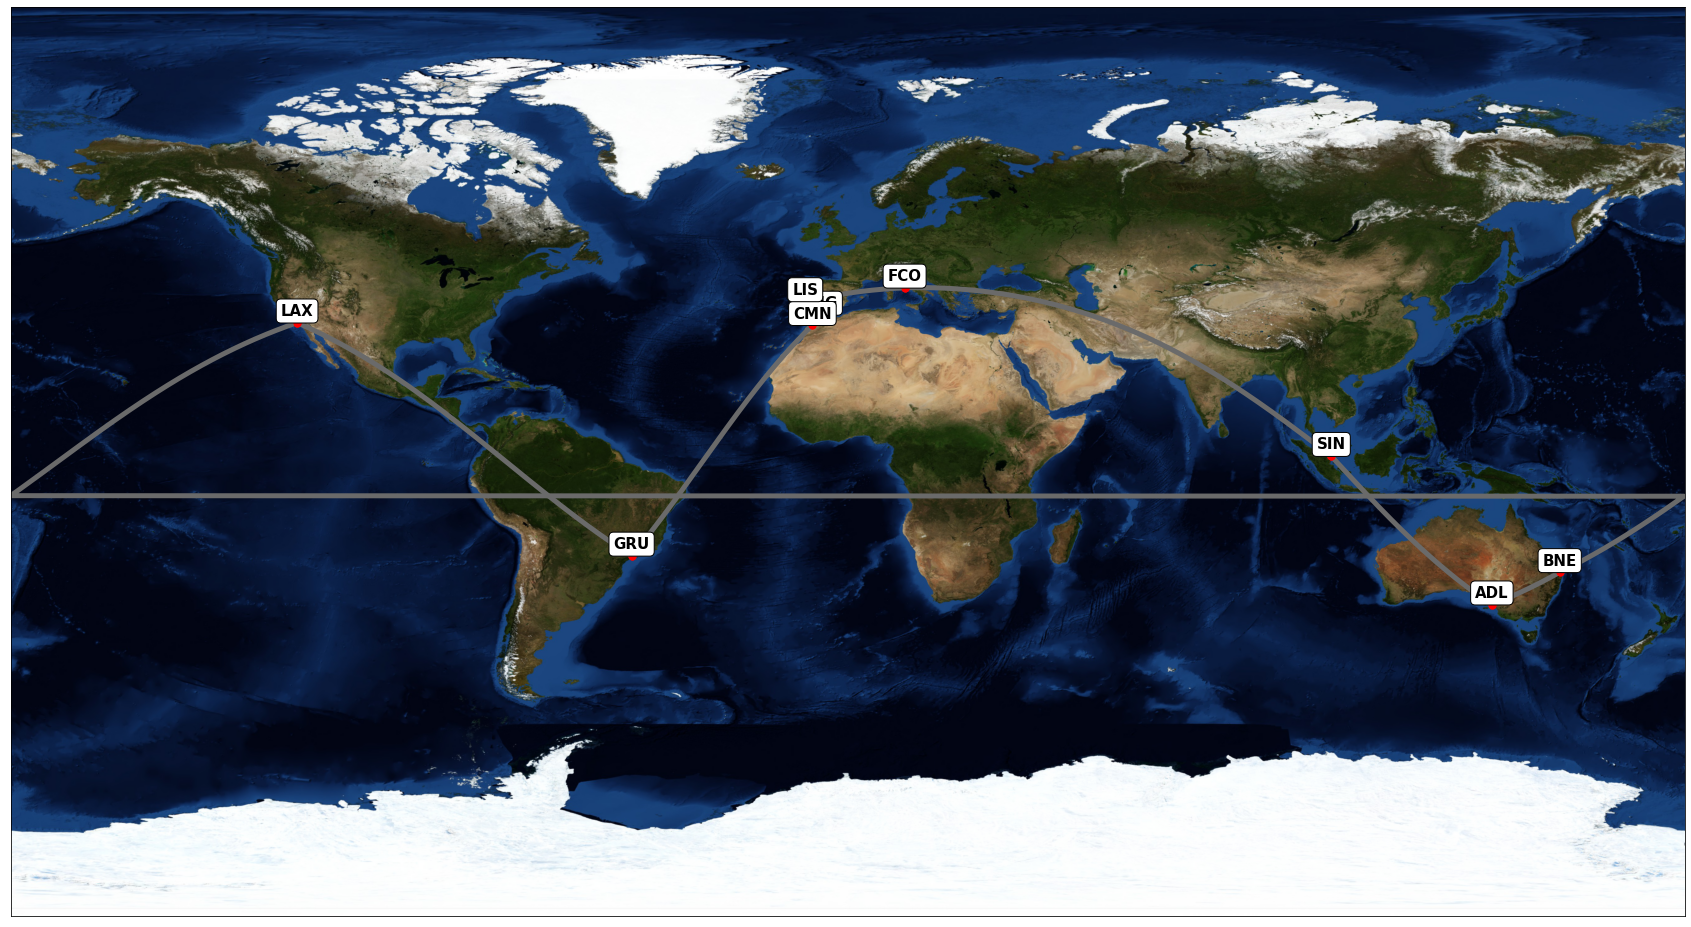

In [9]:
map = rm.get_map(G, sites, sites_pairs)
map

In [10]:
for i in range(len(sites_pairs)):
    flight_details = fl.get_flight_details(sites_pairs[i][0],sites_pairs[i][1],start_date)

    next_date = (datetime.datetime.strptime(start_date,"%Y-%m-%d") + datetime.timedelta(days=7)).date()
    start_date = str(next_date)
    
    print(flight_details)

['11/1', 'LIS', '6:30', 'TNG', '12:55', 'Iberia', '50€']
['17/1', 'TNG', '7:15', 'CMN', '8:35', 'Royal Air Maroc', '89€']
['25/1', 'CMN', '12:20', 'GRU', '23:30', 'TAP AIR PORTUGAL', '568€']
['31/1', 'GRU', '21:50', 'LAX', '10:32', 'American Airlines', '353€']
['7/2', 'LAX', '22:45', 'BNE', '22:25', 'Fiji Airways', '628€']
['14/2', 'BNE', '18:20', 'ADL', '21:25', 'Jetstar', '100€']
['21/2', 'ADL', '8:00', 'SIN', '20:10', 'Jetstar', '241€']
['1/3', 'SIN', '10:00', 'FCO', '22:00', 'Turkish Airlines', '432€']
['7/3', 'FCO', '19:35', 'LIS', '21:30', 'TAP AIR PORTUGAL', '61€']
